Data Location : Kaggle (https://www.kaggle.com/bartomiejczyewski/spotify-top-200-weekly-global-20172021)
## The Week Column is visible as ##### when we first open it.Double Click on one of the first value in Week column and press enter. The rest will be visible.

In [141]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Reading data from CSV

In [142]:
data = pd.read_csv("Spotify.csv")

# displaying all columns
data.columns

Index(['Rank', 'Track', 'Artist', 'Streams', 'Link', 'Week', 'Album_Name',
       'Duration_MS', 'Explicit', 'Track_Number_on_Album', 'Artist_Followers',
       'Artist_Genres'],
      dtype='object')

## DISPLAYING DATA

In [143]:
data.head()

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,06-01-2017,Starboy,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,06-01-2017,Closer,244960,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,06-01-2017,Rockabye (feat. Sean Paul & Anne-Marie),251088,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,06-01-2017,Encore,205946,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,06-01-2017,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"


## Number of Rows and Columns

In [144]:
d = data.shape
d

(44200, 12)

## Different Artist Genre

In [145]:
data.Artist_Genres

0        ['canadian contemporary r&b', 'canadian pop', ...
1        ['dance pop', 'edm', 'electropop', 'pop', 'pop...
2        ['dance pop', 'edm', 'pop', 'pop dance', 'post...
3        ['dance pop', 'edm', 'electronic trap', 'pop',...
4          ['dance pop', 'pop', 'post-teen pop', 'uk pop']
                               ...                        
44195    ['dance pop', 'pop', 'pop rap', 'seattle hip h...
44196    ['argentine hip hop', 'trap argentino', 'trap ...
44197                                    ['pop', 'uk pop']
44198    ['alternative rock', 'grunge', 'permanent wave...
44199                         ['emo rap', 'miami hip hop']
Name: Artist_Genres, Length: 44200, dtype: object

## Checking for Missing Values

In [146]:
#isna() function is used to detect missing values
#isna(). sum() returns the number of missing values in each column.

data.isna().sum()

Rank                     0
Track                    5
Artist                   5
Streams                  0
Link                     0
Week                     0
Album_Name               5
Duration_MS              0
Explicit                 0
Track_Number_on_Album    0
Artist_Followers         0
Artist_Genres            0
dtype: int64

## <i>5 Album names, Tracks and Artist are missing</i>
### removing rows with missing entries

In [147]:
data.dropna(how='any', inplace=True)
data.isna().sum()

Rank                     0
Track                    0
Artist                   0
Streams                  0
Link                     0
Week                     0
Album_Name               0
Duration_MS              0
Explicit                 0
Track_Number_on_Album    0
Artist_Followers         0
Artist_Genres            0
dtype: int64

In [148]:
d1 = data.shape
print("Rows before droping ")
print(d)
print("Rows after droping ")
d1

Rows before droping 
(44200, 12)
Rows after droping 


(44195, 12)

## Droping columns which I am not going to use
### I don't need <b>Link</b> of the songs.
### So I will drop that column. 

In [149]:
data = data.drop(columns=['Link'])

### Checking if the column is droped

In [150]:
data.columns

Index(['Rank', 'Track', 'Artist', 'Streams', 'Week', 'Album_Name',
       'Duration_MS', 'Explicit', 'Track_Number_on_Album', 'Artist_Followers',
       'Artist_Genres'],
      dtype='object')

## Checking the Datatypes

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44195 entries, 0 to 44199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   44195 non-null  int64 
 1   Track                  44195 non-null  object
 2   Artist                 44195 non-null  object
 3   Streams                44195 non-null  int64 
 4   Week                   44195 non-null  object
 5   Album_Name             44195 non-null  object
 6   Duration_MS            44195 non-null  int64 
 7   Explicit               44195 non-null  bool  
 8   Track_Number_on_Album  44195 non-null  int64 
 9   Artist_Followers       44195 non-null  int64 
 10  Artist_Genres          44195 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.8+ MB


## <i>Week</i> is stored as an object.
### Converting it into a datetime. 

In [152]:
data['Week'] = pd.to_datetime(data['Week'], format='%d-%m-%Y')

In [153]:
## Checking datatype of Week
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44195 entries, 0 to 44199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44195 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44195 non-null  int64         
 4   Week                   44195 non-null  datetime64[ns]
 5   Album_Name             44195 non-null  object        
 6   Duration_MS            44195 non-null  int64         
 7   Explicit               44195 non-null  bool          
 8   Track_Number_on_Album  44195 non-null  int64         
 9   Artist_Followers       44195 non-null  int64         
 10  Artist_Genres          44195 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 3.8+ MB


## Extracting Year and Month from Week.
### storing it as columns in data frame

In [154]:
year = data['Week'].apply(lambda x : x.year)
month = data['Week'].apply(lambda x : x.month)
data.insert(loc=6, column='year', value=year) 
data.insert(loc=5, column='month', value=month)

### Checking the new columns and their datatypes

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44195 entries, 0 to 44199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44195 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44195 non-null  int64         
 4   Week                   44195 non-null  datetime64[ns]
 5   month                  44195 non-null  int64         
 6   Album_Name             44195 non-null  object        
 7   year                   44195 non-null  int64         
 8   Duration_MS            44195 non-null  int64         
 9   Explicit               44195 non-null  bool          
 10  Track_Number_on_Album  44195 non-null  int64         
 11  Artist_Followers       44195 non-null  int64         
 12  Artist_Genres          44195 non-null  object        
dtypes

## Getting top 10 Streamed Track from 2017 to 2021 (Weekwise)

In [156]:
top10track = data.sort_values('Streams',ascending=False)
print(top10track[['Track','Artist','Streams','Rank']].head(10).reset_index())

   index            Track          Artist   Streams  Rank
0  41800  drivers license  Olivia Rodrigo  80764045     1
1  21000          7 rings   Ariana Grande  71467874     1
2  15600   In My Feelings           Drake  67499798     1
3  25800         Señorita    Shawn Mendes  67237638     1
4  25600         Señorita    Shawn Mendes  66933317     1
5  41600  drivers license  Olivia Rodrigo  65873080     1
6  15800   In My Feelings           Drake  65825491     1
7  26000         Señorita    Shawn Mendes  64942021     1
8  42000  drivers license  Olivia Rodrigo  64681075     1
9   1800     Shape of You      Ed Sheeran  64275251     1


<BarContainer object of 11 artists>

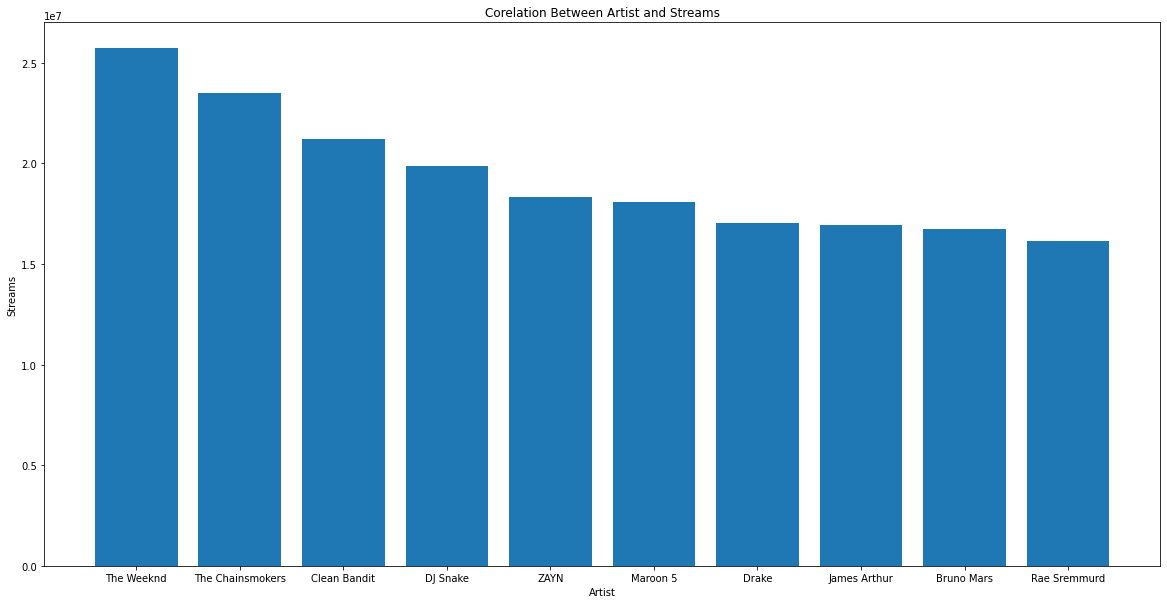

In [157]:
top10track = data.head(11)
type(top10track)
x = top10track.Artist
y= top10track.Streams

plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.title('Corelation Between Artist and Streams')
plt.bar(x, y)

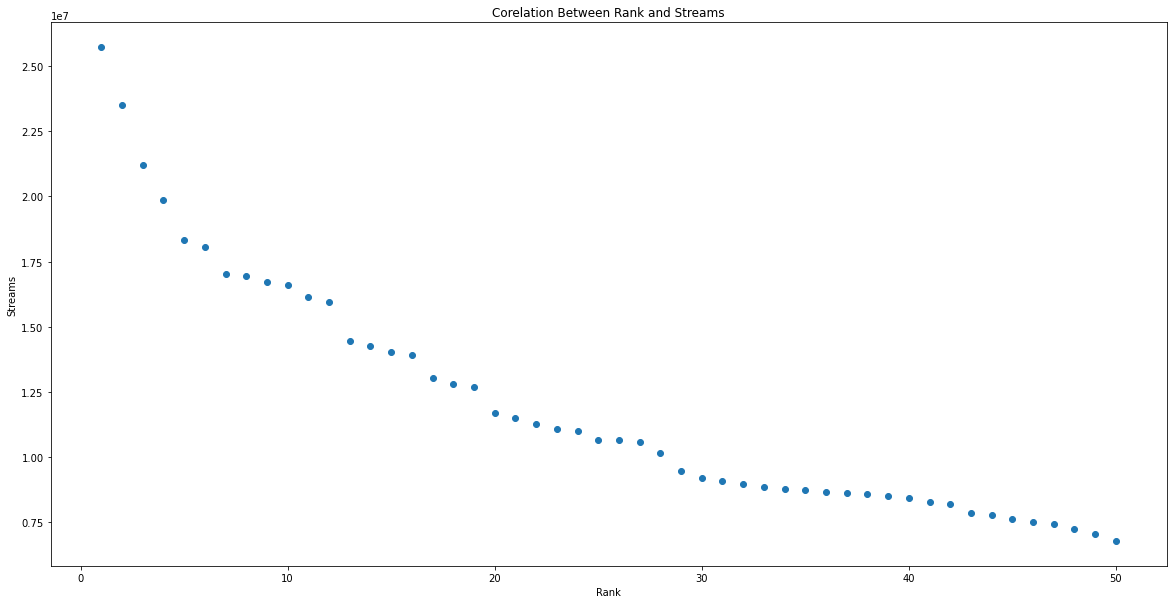

In [158]:
top10track = data.head(50)
type(top10track)
x = top10track.Rank
y= top10track.Streams

plt.figure(figsize=(20,10))
plt.xlabel('Rank')
plt.ylabel('Streams')
plt.title('Corelation Between Rank and Streams')

plt.scatter(x, y)

# Streams of Rank 1 Tracks

In [159]:
rank1= data.sort_values(by=['Rank','Streams'],ascending=True).head(10)
print(rank1[['Track','Streams','Rank']].reset_index())

   index                                           Track   Streams  Rank
0      0                                         Starboy  25734078     1
1  17200                          I Love It (& Lil Pump)  28516766     1
2  10200                                        rockstar  29389063     1
3  17800  Taki Taki (with Selena Gomez, Ozuna & Cardi B)  29542152     1
4   9800                                        rockstar  29659184     1
5  14200                                      Better Now  29702255     1
6  14400                                      Better Now  29726175     1
7   6800                     Too Good At Goodbyes - Edit  30706135     1
8  14000                                      Better Now  30755342     1
9  10000                                        rockstar  30769464     1


<BarContainer object of 10 artists>

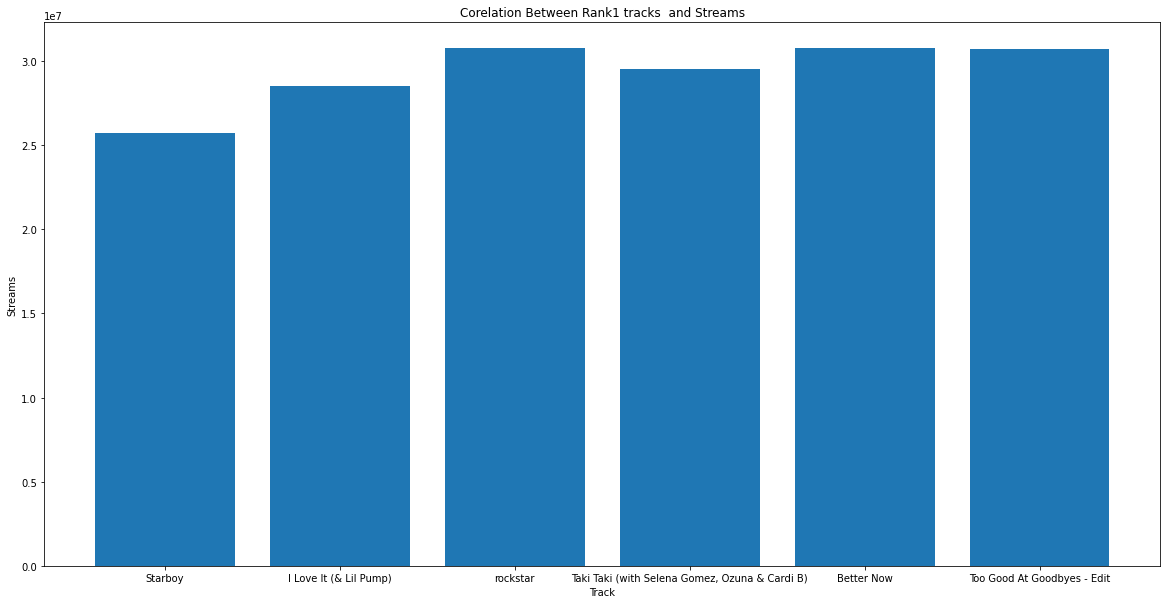

In [160]:
op10track = rank1
x = op10track.Track
y= op10track.Streams

plt.figure(figsize=(20,10))
plt.xlabel('Track')
plt.ylabel('Streams')
plt.title('Corelation Between Rank1 tracks  and Streams')

plt.bar(x, y)

top10track = data.head(11)
type(top10track)
x = top10track.Artist
y= top10track.Streams

plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Streams')

plt.bar(x, y)

## Getting top 10 followed artists
### Droping Duplicates rows. As this data is accumulated week wise. So Artist Name might get repeated.
Hence using <b>drop_duplicates(subset='Artist')</b>

In [161]:
top10artist = data.sort_values('Artist_Followers',ascending=False).drop_duplicates(subset='Artist')
print(top10artist[['Artist','Artist_Followers']].head(10).reset_index())

   index           Artist  Artist_Followers
0  37745       Ed Sheeran          78967872
1  16644    Ariana Grande          61390454
2   1541            Drake          54405324
3  19643    Justin Bieber          44672226
4  31469           Eminem          43728461
5   4587          Rihanna          42275572
6  24167    Billie Eilish          41852475
7  28037     Taylor Swift          38902703
8  36517  Imagine Dragons          33692509
9  25753            Queen          33527593


<BarContainer object of 10 artists>

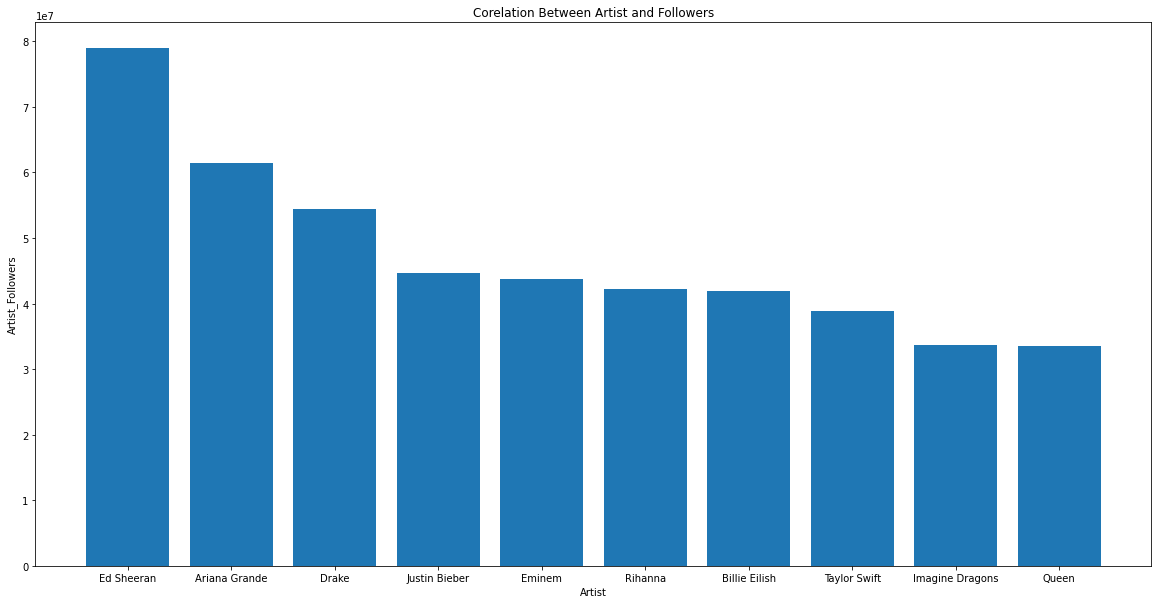

In [175]:
#top10artist = data.head(11)
#type(top10artist)
x1 = top10artist.Artist.head(10)
#print(x1)

y2= top10artist.Artist_Followers.head(10)
plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Artist_Followers')
plt.title('Corelation Between Artist and Followers')

plt.bar(x1, y2)

## top  streams of each year(In a Week)

In [163]:
top5_by_year = data.sort_values(by=['Streams'], ascending=False).groupby(['year'],sort=True).head(1).reset_index()

# top_by_year = data.groupby(["year"]).sort(by=['Streams'],ascending=False).head(1)
# top5_of_year = data.sort_values(by=['Streams','year','Artist'],ascending=False).head(5)
print(top5_by_year[['Track', 'Streams','year','Rank']].sort_values(by=['year']))

                             Track   Streams  year  Rank
3                     Shape of You  64275251  2017     1
2                   In My Feelings  67499798  2018     1
1                          7 rings  71467874  2019     1
4  All I Want for Christmas Is You  53401383  2020     1
0                  drivers license  80764045  2021     1


x1 = top5_by_year.Track.head(2)
#print(x1)
y2= top5_by_year['Rank'].head(2)
plt.figure(figsize=(20,10))
plt.xlabel('Artist')
plt.ylabel('Rank')

plt.bar(x1, y2)

## top  streams of all time

In [165]:
Top5= data.groupby(['year','Track']).agg({'Streams':sum}).sort_values(['Streams'],ascending=False)
Top5.head(5)

,,Streams
year,Track,
2020,Blinding Lights,1660934276
2017,Shape of You,1456882225
2020,Dance Monkey,1231997497
2018,God's Plan,1138561345
2020,Falling,1103178866


## Analyzing Artist Genre
We observe that the column 'Artist Genre' has a list passed as value. Let's split these lists into individual values. 

In [166]:
data[data["Artist_Genres"]=='[]']
df_genre=data[data["Artist_Genres"]!='[]']
df_genre.head()
df_sort_genres=pd.DataFrame(data.assign(Artist_Genres=df_genre.Artist_Genres.str.split(",")).explode('Artist_Genres'))

### Replacing the square brackets with " " blank spaces to get only the keywords.

In [167]:
df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace('[',' ')
df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace(']',' ')

C:\Users\Nikki\AppData\Local\Temp/ipykernel_28724/166888204.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace('[',' ')
C:\Users\Nikki\AppData\Local\Temp/ipykernel_28724/166888204.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sort_genres['Artist_Genres']=df_sort_genres.Artist_Genres.str.replace(']',' ')


## Let's analyze the top 10 genres now.



In [168]:
# 10 Most common Genre
n = 10
top_10=pd.DataFrame(df_sort_genres['Artist_Genres'].value_counts()[:n]).reset_index()
top_10.rename(columns = {'index':'Genres','Artist_Genres':'Total_Count'}, inplace = True)
top_10

,Genres,Total_Count
0,'pop',16809
1,'dance pop',11173
2,'latin',6208
3,'rap',5915
4,'pop rap',5601
5,'post-teen pop',5559
6,'reggaeton',5530
7,'edm',4762
8,'electropop',4536
9,'pop dance',4269


## Pie chart

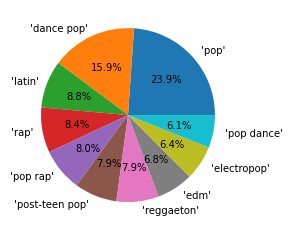

In [169]:
plt.pie(top_10.Total_Count, labels=top_10.Genres , autopct='%1.1f%%')
plt.show()

## Top 5 Streamed Songs for Each Year (Weekwise)

In [170]:
top5_by_year = data.groupby(["year"])

top5_of_2017 = top5_by_year.get_group(2017).sort_values('Streams',ascending=False).head(5)
print(top5_of_2017[['Track', 'Streams','Week']].reset_index())

top5_of_2018 = top5_by_year.get_group(2018).sort_values('Streams',ascending=False).head(5)
print(top5_of_2018[['Track', 'Streams','Week']].reset_index())

top5_of_2019 = top5_by_year.get_group(2019).sort_values('Streams',ascending=False).head(5)
print(top5_of_2019[['Track', 'Streams','Week']].reset_index())

top5_of_2020 = top5_by_year.get_group(2020).sort_values('Streams',ascending=False).head(5)
print(top5_of_2020[['Track', 'Streams','Week']].reset_index())

top5_of_2021 = top5_by_year.get_group(2021).sort_values('Streams',ascending=False).head(5)
print(top5_of_2021[['Track', 'Streams','Week']].reset_index())

   index              Track   Streams       Week
0   1800       Shape of You  64275251 2017-03-10
1   2000       Shape of You  57006531 2017-03-17
2   4000  Despacito - Remix  54848635 2017-05-26
3   1200       Shape of You  53604545 2017-02-17
4   1000       Shape of You  53551099 2017-02-10
   index           Track   Streams       Week
0  15600  In My Feelings  67499798 2018-07-20
1  15800  In My Feelings  65825491 2018-07-27
2  16000  In My Feelings  60285459 2018-08-03
3  19000   thank u, next  59975503 2018-11-16
4  11600      God's Plan  54891573 2018-03-02
   index     Track   Streams       Week
0  21000   7 rings  71467874 2019-01-25
1  25800  Señorita  67237638 2019-07-12
2  25600  Señorita  66933317 2019-07-05
3  26000  Señorita  64942021 2019-07-19
4  21600   7 rings  63197614 2019-02-15
   index                            Track   Streams       Week
0  41000  All I Want for Christmas Is You  53401383 2020-12-25
1  40400                           DÁKITI  53344093 2020-12-04
2

## Popular Artist_genres based to streams

In [171]:
pop_genre = df_sort_genres.groupby("Artist_Genres")[["Streams"]].sum().sort_values("Streams",ascending=False).head(5)
pop_genre

,Streams
Artist_Genres,
'pop',143706744788
'dance pop',92494985911
'post-teen pop',49832007924
'latin',49657003741
'rap',48063700010


## Most Streamed Albums

In [172]:
top10Album = data.groupby(['Album_Name']).agg({'Streams':sum}).sort_values(['Streams'],ascending=False)
print(top10Album.columns)
print(top10Album.head(10))


Index(['Streams'], dtype='object')
                                             Streams
Album_Name                                          
÷ (Deluxe)                                6573935128
beerbongs & bentleys                      4097713238
WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?  4092520586
?                                         3529519747
Hollywood's Bleeding                      3459323111
thank u, next                             3308865952
Scorpion                                  3131020857
Evolve                                    3078558765
After Hours                               2792686061
Fine Line                                 2702681616


Top52017= data.groupby(['year','Track']).agg({'Streams':sum}).sort_values(['Streams'],ascending=False)
Top52017.head(10)

In [173]:
data.sort_values('Week', ascending=False).head(1)

,Rank,Track,Artist,Streams,Week,month,Album_Name,year,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
44199,200,SAD!,XXXTENTACION,5139543,2021-04-16,4,?,2021,166605,True,4,26792113,"['emo rap', 'miami hip hop']"


In [174]:
data.sort_values('Week', ascending=True).head(1)

,Rank,Track,Artist,Streams,Week,month,Album_Name,year,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,2017-01-06,1,Starboy,2017,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
